Aniqlik: 1.0
Confusion matrix:
 [[2 0]
 [0 1]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



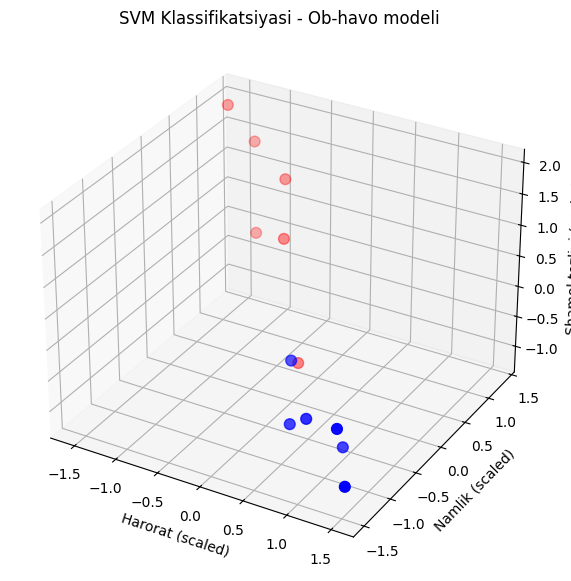

In [2]:
# SVM asosida ob-havo klassifikatsiyasi

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import training_testing_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

# 1. Ob-havo ma'lumotlari [harorat, namlik, shamol tezligi]
X = np.array([
    [30, 40, 10],   # quyoshli
    [25, 60, 12],
    [20, 85, 14],   # yomg'irli
    [18, 90, 20],
    [28, 55, 9],
    [22, 80, 15],
    [24, 70, 10],
    [27, 50, 11],
    [21, 88, 17],
    [19, 92, 18],
    [26, 52, 10],
    [29, 45, 12]
])

y = np.array([0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0])  # 0: yog'maydi, 1: yog'adi

# 2. Standartlashtirish
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train/Testga ajratish
X_training, X_testing, y_training, y_testing = training_testing_split(X_scaled, y, testing_size=0.25, random_state=42)

# 4. SVM model (linear kernel)
model = svm.SVC(kernel='linear')
model.fit(X_training, y_training)

# 5. Bashorat va baholash
y_pred = model.predict(X_testing)
print("Aniqlik:", accuracy_score(y_testing, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_testing, y_pred))
print("Classification report:\n", classification_report(y_testing, y_pred))

# 6. Vizualizatsiya (3D)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
colors = ['blue' if label == 0 else 'red' for label in y]

ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=colors, s=60)
ax.set_xlabel('Harorat (scaled)')
ax.set_ylabel('Namlik (scaled)')
ax.set_zlabel('Shamol tezligi (scaled)')
ax.set_title('SVM Klassifikatsiyasi - Ob-havo modeli')
plt.show()